# Install All Libs

In [7]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 72.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install statsmodels

  Using cached statsmodels-0.14.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp310-cp310-macosx_11_0_arm64.whl (9.9 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Note: you may need to restart the kernel to use updated packages.


# Import

## import default

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Import SKLearn

In [15]:
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# Cross-Validation models.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [51]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
sns.set()

# Import Dataset

In [65]:
insurance_dataset = pd.read_csv('./data/insurance_original.csv', decimal=',', sep=';')

# Visualização de dados(inicial)

## View Básica
- view dataset (head)
- view qtd. Rows and Coolumns

In [66]:
# View Dataset
insurance_dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,encargos,amigos,inimigos,chips,fritas,miojo,comportamento
0,19,feminino,NaN,0,sim,sudoeste,16884.92400,5,3,7,5,3,6
1,18,masculino,33.770,1,nao,sudeste,1725.55230,0,1,4,4,4,3
2,28,masculino,33.000,3,nao,sudeste,4449.46200,9,3,5,2,1,3
3,33,masculino,22.705,0,nao,noroeste,21984.47061,5,10,4,3,2,4
4,32,masculino,28.880,0,nao,noroeste,3866.85520,4,3,4,4,1,7


In [67]:
# View Qtd. Rows and Columns
insurance_dataset.shape

print(f'esse dataset tem {insurance_dataset.shape[0]} linhas e {insurance_dataset.shape[1]} colunas')

esse dataset tem 1338 linhas e 13 colunas


In [68]:
# About data
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          1338 non-null   int64  
 1   sexo           1338 non-null   object 
 2   imc            1327 non-null   float64
 3   filhos         1338 non-null   int64  
 4   fumante        1338 non-null   object 
 5   regiao         1338 non-null   object 
 6   encargos       1338 non-null   float64
 7   amigos         1338 non-null   int64  
 8   inimigos       1338 non-null   int64  
 9   chips          1338 non-null   int64  
 10  fritas         1338 non-null   int64  
 11  miojo          1338 non-null   int64  
 12  comportamento  1338 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 136.0+ KB


In [69]:
#about exist null
insurance_dataset.isnull().sum()

idade             0
sexo              0
imc              11
filhos            0
fumante           0
regiao            0
encargos          0
amigos            0
inimigos          0
chips             0
fritas            0
miojo             0
comportamento     0
dtype: int64

In [70]:
#Statistics Basic Info 
insurance_dataset.describe()

,idade,imc,filhos,encargos,amigos,inimigos,chips,fritas,miojo,comportamento
count,1338.000000,1327.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,40.670404,30.667841,1.094918,13270.422265,4.933483,4.905830,3.955157,4.068012,4.026906,3.973842
std,34.784427,6.103216,1.205493,12110.011237,3.198855,3.137599,1.985231,1.972665,1.960536,1.991020
min,-3.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,26.250000,26.302500,0.000000,4740.287150,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,39.000000,30.400000,1.000000,9382.033000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000
75%,51.000000,34.687500,2.000000,16639.912515,8.000000,8.000000,6.000000,6.000000,6.000000,6.000000
max,999.000000,53.130000,5.000000,63770.428010,10.000000,10.000000,7.000000,7.000000,7.000000,7.000000


In [71]:
# view dupliacted rows
insurance_dataset.duplicated().sum()

0

In [72]:
#existe uma linha duplicada
linhas_duplicadas = insurance_dataset[insurance_dataset.duplicated(keep=False)]

# Exibir as linhas duplicadas(dados iguais)
print(linhas_duplicadas)

Empty DataFrame
Columns: [idade, sexo, imc, filhos, fumante, regiao, encargos, amigos, inimigos, chips, fritas, miojo, comportamento]
Index: []


In [73]:
#Visualizar as Colunas
insurance_dataset.columns

Index(['idade', 'sexo', 'imc', 'filhos', 'fumante', 'regiao', 'encargos',
       'amigos', 'inimigos', 'chips', 'fritas', 'miojo', 'comportamento'],
      dtype='object')

## Descrição das Colunas
- 'idade'= 
- 'sexo'=
- 'imc'=
- 'filhos'=
- 'fumante'=
- 'regiao'=
- 'encargos'=
- 'amigos'=
- 'inimigos'=
- 'chips'=
- 'fritas'=
- 'miojo'=
- 'comportamento'=

In [74]:
# view das colunas
# for coluna in insurance_dataset.columns :
#     print(insurance_dataset.value_counts(coluna))

### Charges(encargos) x Age(idade)

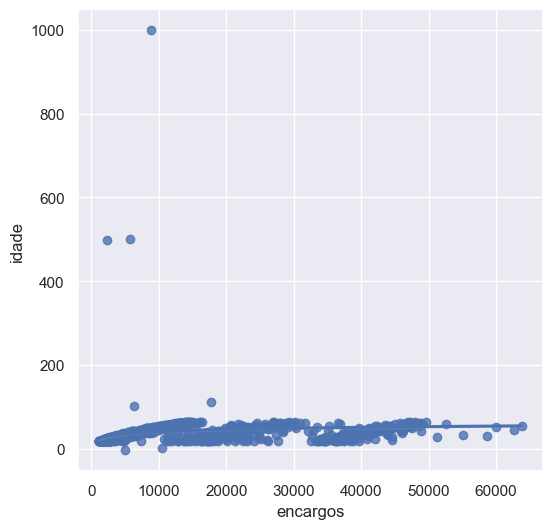

In [76]:
plt.figure(figsize=(6,6))
sns.regplot(data=insurance_dataset, x="encargos", y="idade", logx=True)
plt.show()

### Age

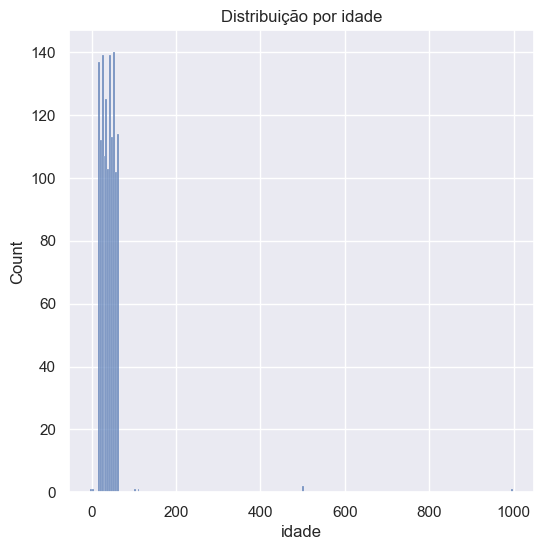

In [83]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['idade'])
plt.title('Distribuição por idade')
plt.show()

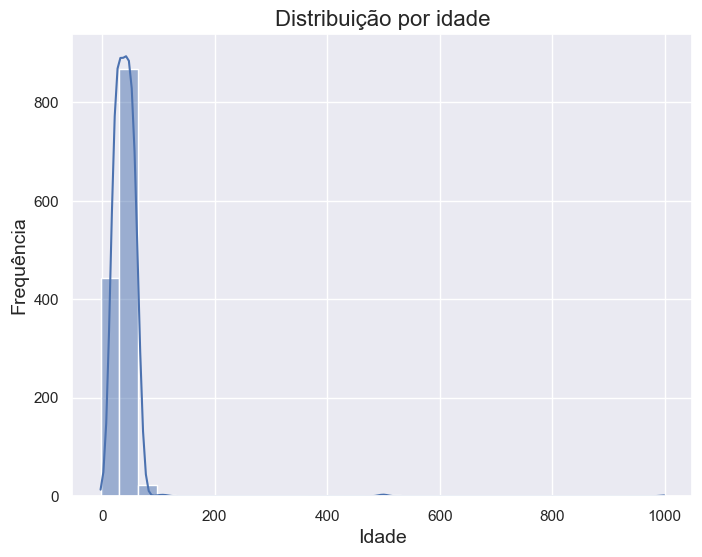

In [80]:
plt.figure(figsize=(8,6))
sns.histplot(insurance_dataset['idade'], bins=30, kde=True)
plt.title('Distribuição por idade', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.grid(True)
plt.show()

### sexo

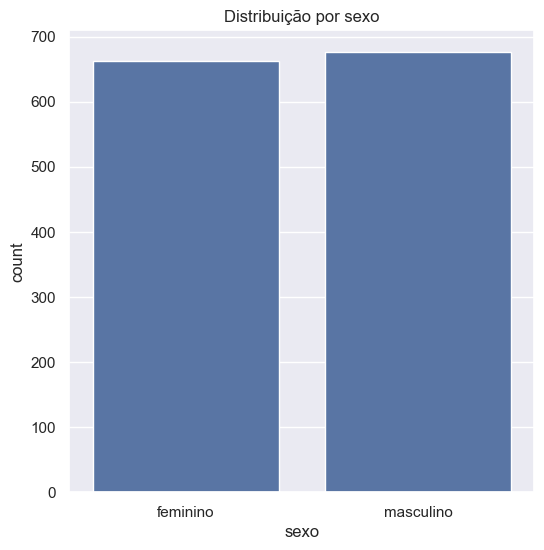

In [84]:

plt.figure(figsize=(6,6))
sns.countplot(x='sexo', data=insurance_dataset)
plt.title('Distribuição por sexo')
plt.show()

In [85]:
insurance_dataset['sexo'].value_counts()

sexo
masculino    676
feminino     662
Name: count, dtype: int64

### IMC

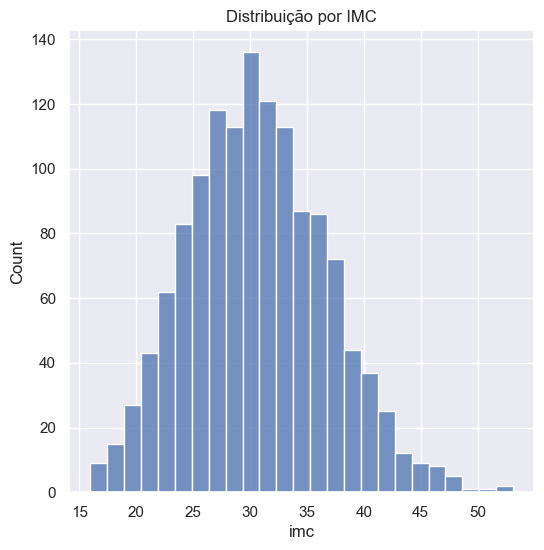

In [86]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['imc'])
plt.title('Distribuição por IMC')
plt.show()

### Children

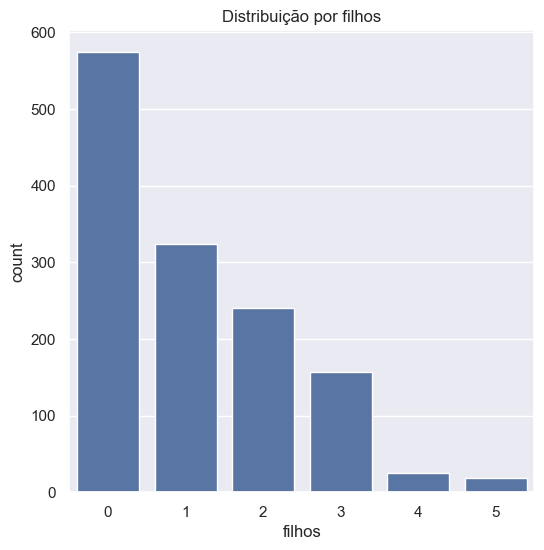

In [87]:
plt.figure(figsize=(6,6))
sns.countplot(x='filhos', data=insurance_dataset)
plt.title('Distribuição por filhos')
plt.show()

In [89]:
# totais de registros por qtd de filhos
insurance_dataset['filhos'].value_counts()

filhos
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Smoker

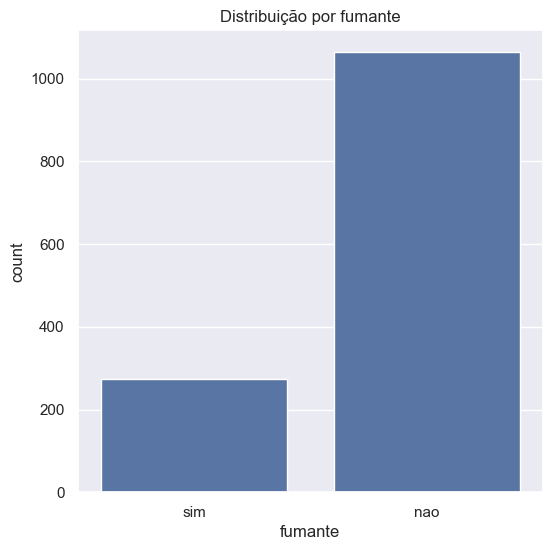

In [90]:
plt.figure(figsize=(6,6))
sns.countplot(x='fumante', data=insurance_dataset)
plt.title('Distribuição por fumante')
plt.show()